 # 1 Investigating the dataset

## 1.1 Dataset description

 ### 1.1.1 dataset description

In [1]:
import scipy.io as sio
import numpy as np
import pandas as pd

In [2]:
# PS:To avoid ambiguity, we put the data set and the code in the same folder
# Load the PaviaU dataset
paviau_data = sio.loadmat('PaviaU.mat')
# Load the PaviaU_gt (ground truth) dataset
paviau_gt_data = sio.loadmat('PaviaU_gt.mat')

In [5]:
# Print the content of the .mat file
print(paviau_data)

# Print the keys of the .mat data
print(paviau_data.keys())

{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Fri May 20 18:21:46 2011', '__version__': '1.0', '__globals__': [], 'paviaU': array([[[ 647,  499,  464, ..., 3221, 3238, 3250],
        [ 604,  546,  527, ..., 2442, 2464, 2528],
        [ 621,  746,  556, ..., 2308, 2345, 2361],
        ...,
        [ 524,  525,  598, ..., 2936, 2940, 2950],
        [ 528,  330,   70, ..., 2737, 2774, 2829],
        [ 711,  483,  423, ..., 2562, 2539, 2488]],

       [[ 705,  681,  668, ..., 2607, 2607, 2609],
        [ 891,  692,  453, ..., 1581, 1561, 1522],
        [ 547,  511,  604, ..., 1535, 1531, 1538],
        ...,
        [1149,  658,  434, ..., 3247, 3251, 3277],
        [ 917, 1004,  743, ..., 2828, 2806, 2808],
        [1037,  849,  547, ..., 2491, 2527, 2522]],

       [[1084,  875,  706, ..., 2108, 2167, 2183],
        [ 335,  517,  611, ..., 1105, 1109, 1095],
        [1042,  683,  318, ...,  806,  791,  814],
        ...,
        [ 799,  693,  481, ..., 2761, 2791, 2

In [6]:
# Print the content of the .mat file
print(paviau_gt_data)

# Print the keys of the .mat data
print(paviau_gt_data.keys())

{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Fri May 20 18:25:52 2011', '__version__': '1.0', '__globals__': [], 'paviaU_gt': array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [2, 2, 2, ..., 0, 0, 0],
       [2, 2, 2, ..., 0, 0, 0],
       [2, 2, 2, ..., 0, 0, 0]], dtype=uint8)}
dict_keys(['__header__', '__version__', '__globals__', 'paviaU_gt'])


In [3]:
# Extract the data and ground truth arrays
paviau_data_array = paviau_data['paviaU']
paviau_gt_array = paviau_gt_data['paviaU_gt']

# Print dimensions and data types
print("PaviaU Data Dimensions:", paviau_data_array.shape)
print("PaviaU Data Type:", paviau_data_array.dtype)

print("PaviaU Ground Truth Dimensions:", paviau_gt_array.shape)
print("PaviaU Ground Truth Data Type:", paviau_gt_array.dtype)

# Check for missing values
print("Missing values in PaviaU Data:", np.isnan(paviau_data_array).sum())
print("Missing values in PaviaU Ground Truth:", np.isnan(paviau_gt_array).sum())

# Check for unique values in ground truth (labels)
unique_labels, counts = np.unique(paviau_gt_array, return_counts=True)
print("Unique labels in PaviaU Ground Truth:", unique_labels)
print("Counts for each label:", counts)

PaviaU Data Dimensions: (610, 340, 103)
PaviaU Data Type: uint16
PaviaU Ground Truth Dimensions: (610, 340)
PaviaU Ground Truth Data Type: uint8
Missing values in PaviaU Data: 0
Missing values in PaviaU Ground Truth: 0
Unique labels in PaviaU Ground Truth: [0 1 2 3 4 5 6 7 8 9]
Counts for each label: [164624   6631  18649   2099   3064   1345   5029   1330   3682    947]


##### In the above code, we can indeed print a unique label in PaviaU data and its count. Typically, however, the PaviaU dataset is a multispectral image dataset with multiple channels of value per pixel, so its "label" is usually a multidimensional vector rather than a single label value. Therefore, printing a unique label directly may not make much sense.

### 1.1.2 visualization

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import spectral

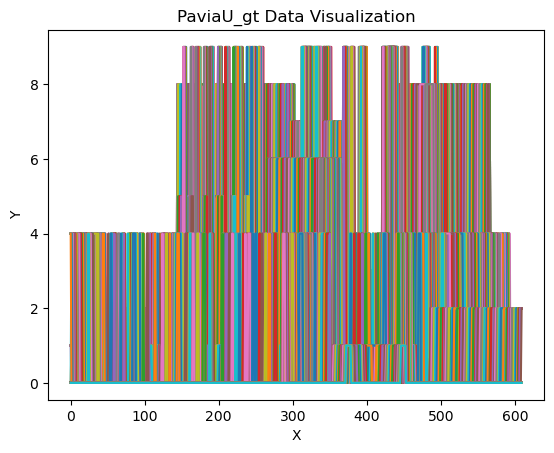

In [9]:
# Visual data
plt.plot(paviau_gt_array)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('PaviaU_gt Data Visualization')
plt.show()

ImageView object:
  Display bands       :  (60, 40, 20)
  Interpolation       :  <default>
  RGB data limits     :
    R: [0.0, 8000.0]
    G: [0.0, 8000.0]
    B: [0.0, 8000.0]



D:\Anaconda3\lib\site-packages\spectral\graphics\spypylab.py:796: UserWarning: Failed to create RectangleSelector object. Interactive pixel class labeling will be unavailable.
  warnings.warn(msg)


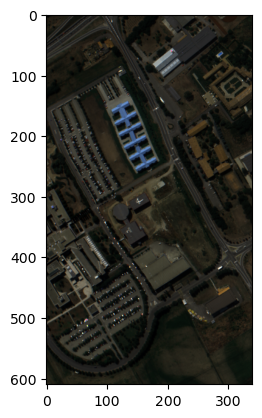

In [5]:
# (60, 40, 20) is a tuple specifying the indices of the spectral bands to display
view = spectral.imshow(paviau_data_array, (60, 40, 20))

# Print information about the image display (view object)
print(view)

# Use the show function from Matplotlib to display the image
plt.show()

In [11]:
# Reshape the data for easier manipulation
reshaped_data = paviau_data_array.reshape(paviau_data_array.shape[0] * paviau_data_array.shape[1], -1)

# Create a DataFrame from the reshaped data
df = pd.DataFrame(reshaped_data)

# Rename columns to 'band1', 'band2', ...
df.columns = [f'band{i}' for i in range(1, df.shape[-1] + 1)]

# Add a 'class' column for ground truth labels
df['class'] = paviau_gt_array.ravel()

# Now, we have a DataFrame 'df' with columns 'band1', 'band2', ... representing spectral bands,
# and a 'class' column containing ground truth labels.

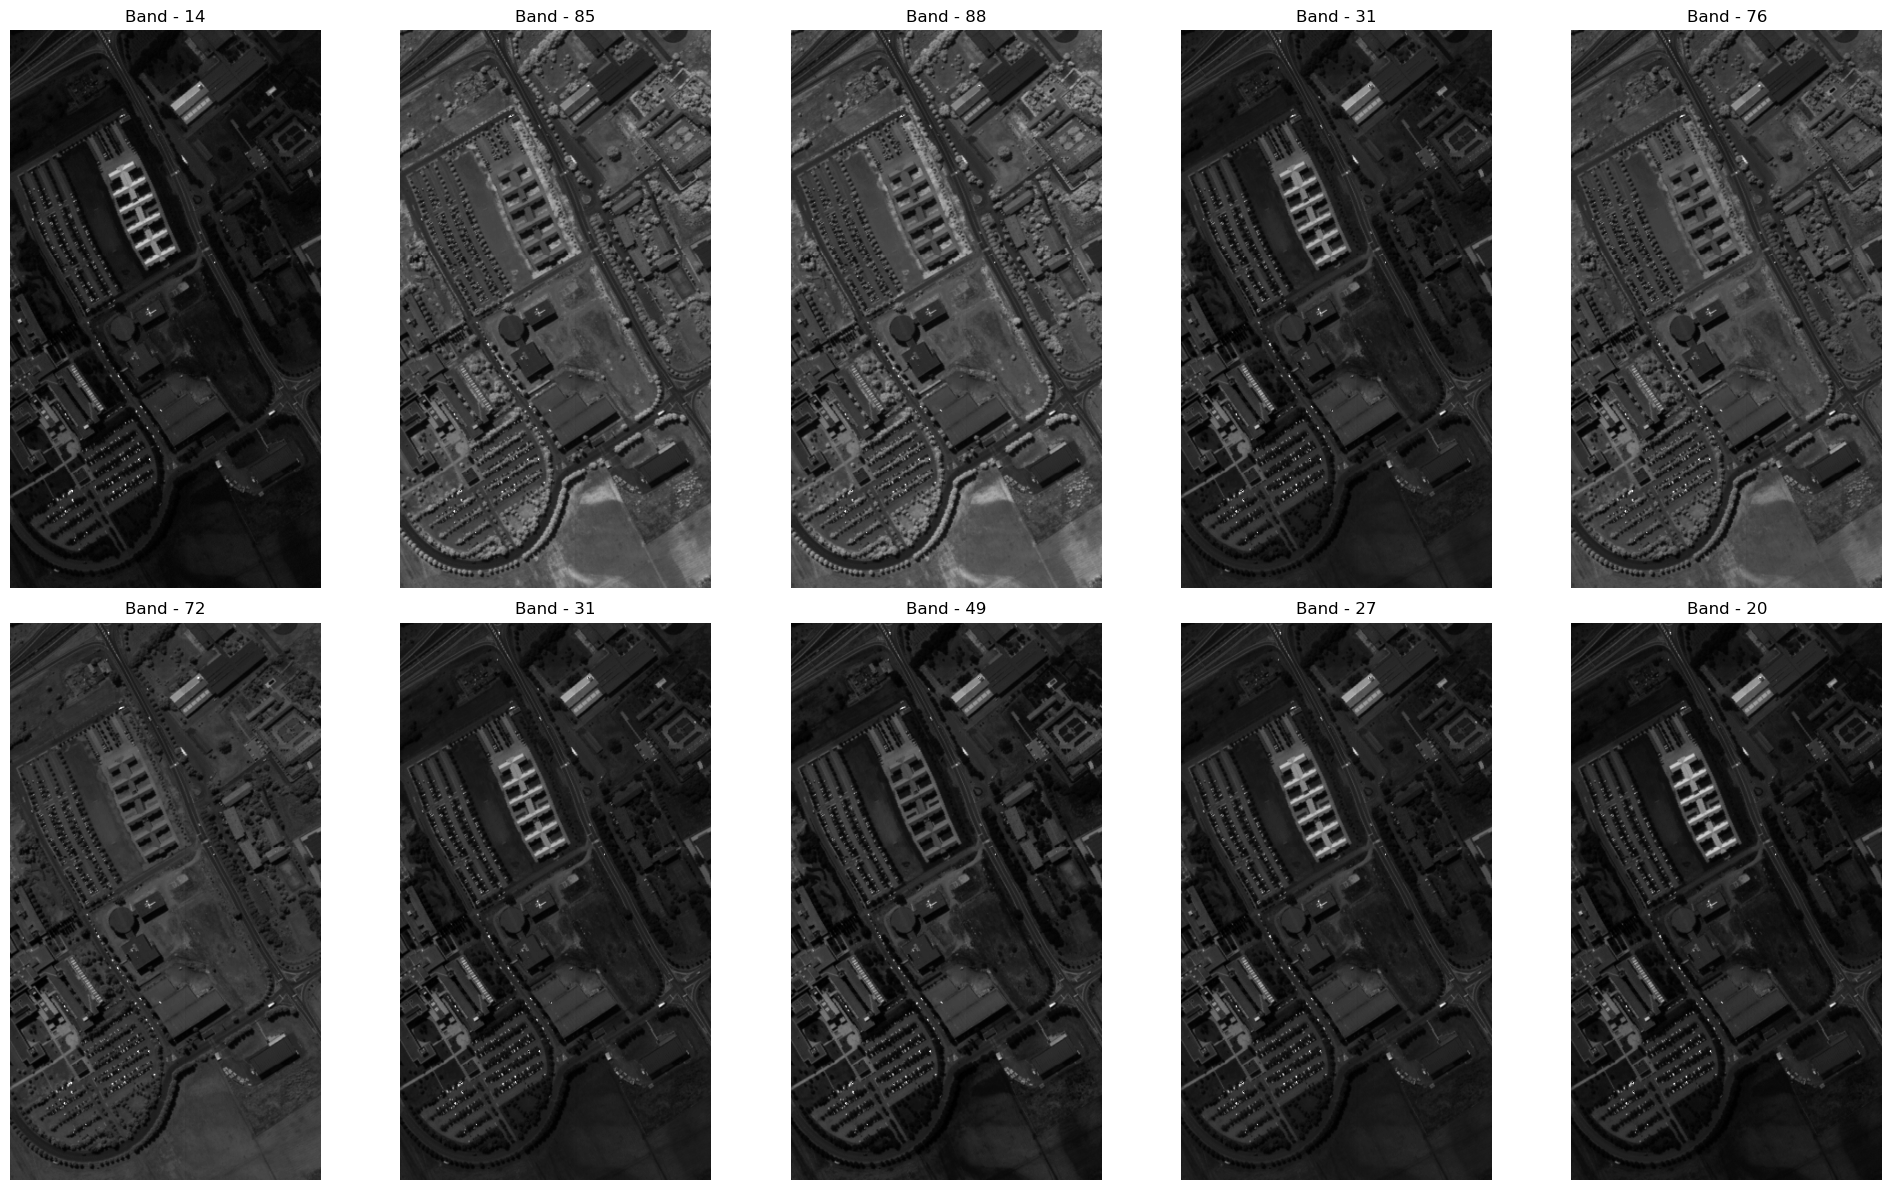

In [12]:
# Create a figure with subplots
fig = plt.figure(figsize=(20, 12))
ax = fig.subplots(2, 5)  # 2 rows and 5 columns of subplots

# Loop through the subplots
for i in range(2):
    for j in range(5):
        # Generate a random band index between 0 and 102
        c = np.random.randint(103)
        
        # Display the band using a grayscale colormap
        ax[i][j].imshow(paviau_data_array[:, :, c], cmap='gray')
        
        # Turn off axis labels
        ax[i][j].axis('off')
        
        # Set the title of the subplot to indicate the band number
        ax[i][j].title.set_text(f"Band - {c}")
        
        # Increment the band index
        c += 1

# Adjust the layout and display the plot
plt.tight_layout()
plt.show()

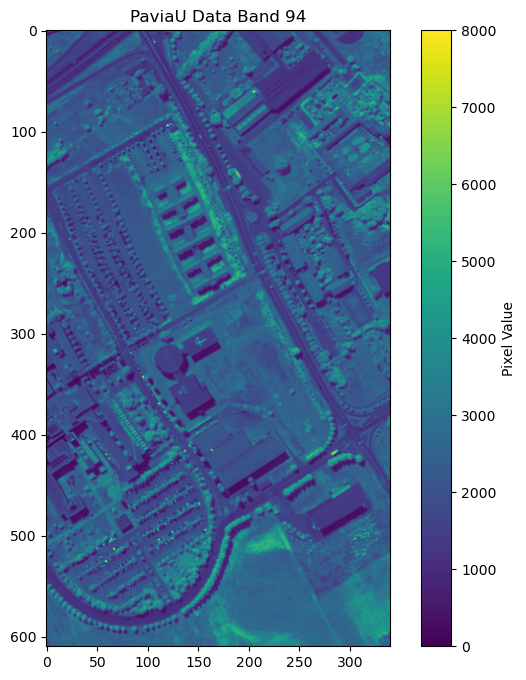

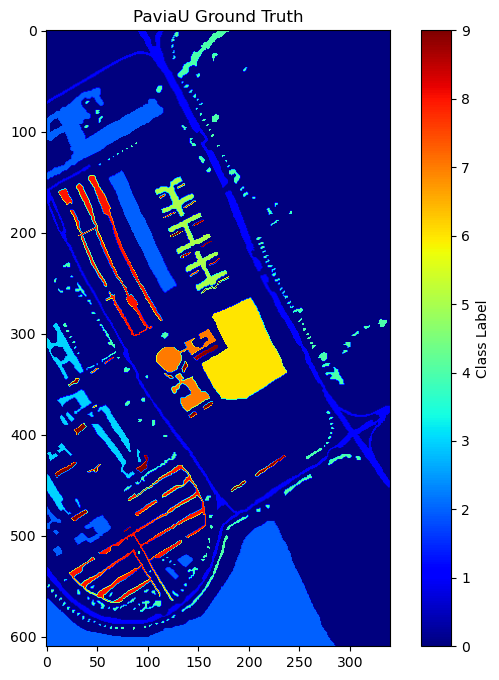

In [13]:
# Visualize a random sample from the PaviaU data
sample_index = np.random.randint(0, paviau_data_array.shape[2])  # Choose a random band
sample_band = paviau_data_array[:, :, sample_index]

# Plot the random sample
plt.figure(figsize=(8, 8))  # Create a new figure with a size of 8x8 inches
plt.imshow(sample_band, cmap='viridis')  # Display the image using the 'viridis' colormap
plt.colorbar(label='Pixel Value')  # Add a colorbar to the plot with the label 'Pixel Value'
plt.title(f'PaviaU Data Band {sample_index}')  # Set the title of the plot
plt.show()  # Show the plot

# Visualize the ground truth
plt.figure(figsize=(8, 8))  # Create a new figure with a size of 8x8 inches
plt.imshow(paviau_gt_array, cmap='jet')  # Display the ground truth image using the 'jet' colormap
plt.colorbar(label='Class Label')  # Add a colorbar to the plot with the label 'Class Label'
plt.title('PaviaU Ground Truth')  # Set the title of the plot
plt.show()  # Show the plot

### 1.1.3 proper references

#### Reference List for Investigating the dataset:
#### Python解析mat文件 (no date) Python解析mat文件_.mat是什么文件-CSDN博客.  Available at: https://blog.csdn.net/sinat_29957455/article/details/105436000 (Accessed: 10 October 2023). 
#### Manav Narula (no date) Read Matlab mat Files in Python Available at: https://www.delftstack.com/howto/python/read-mat-files-python/(Accessed: 10 October 2023). 
#### 使用Python实现.mat文件转换、读取 (no date) 使用Python实现.mat文件转换、读取_python读取mat数据_数产小黑娃的博客-CSDN博客. Available at: https://blog.csdn.net/qq_53860947/article/details/131478681 (Accessed: 10 October 2023). 
#### nadagamal3 (2023) Hyperspectral classification, Kaggle. Available at: https://www.kaggle.com/code/nadagamal3/hyperspectral-classification (Accessed: 10 October 2023). 

## 1.2 Feature selection

### 1.2.1 possibility of using feature selection methods & 1.2.2 explanation

### Dataset Features (X)

In our analysis, we work with the PaviaU dataset, where X represents the features or input variables. These features describe the characteristics of each data point in our dataset. In our case, each data point is an image pixel, and the features can include various spectral bands or other relevant attributes.

For example, the features in our dataset may include:

1. Spectral Reflectance Values: These values represent the reflectance of different spectral bands, capturing information about the surface materials in the image.

2. Spatial Coordinates: Depending on the dataset, you may also have spatial coordinates (X and Y) representing the pixel's location within the image.

3. Derived Features: We may have derived features, such as principal components obtained through dimensionality reduction techniques like PCA, as discussed earlier.

### Labels/Targets (y)

The labels or targets (y) in our dataset represent the ground truth information associated with each data point. In the context of the PaviaU dataset, the labels typically represent the land cover or land use class of each pixel. These labels are crucial for supervised learning tasks such as classification or segmentation.

For example, the labels may include:

1. Land Cover Classes: These can include categories like vegetation, urban areas, water bodies, roads, and more, each represented by a numeric code.

2. Ground Truth Images: In some cases, the ground truth labels may be provided as a separate image, where each pixel corresponds to a specific land cover class.

3. One-Hot Encoding: For machine learning tasks, we might use one-hot encoding to represent these classes as binary vectors, where each class is represented by a unique combination of 0s and 1s.

Understanding the features (X) and labels/targets (y) is crucial for effectively analyzing and modeling our dataset. We can use this information to train machine learning models for tasks such as classification, segmentation, or regression, depending on our research goals.


In [14]:
# Flatten the data to create X (features)
X = paviau_data_array.reshape(-1, paviau_data_array.shape[2])

# Flatten the ground truth to create y (labels)
y = paviau_gt_array.ravel()

print(X.shape)
print(y.shape)

(207400, 103)
(207400,)


#### Reference: da Silva, A.R. and Silveira, C.G. (2022) ‘Handcrafted Feature Selection Techniques for Pattern Recognition: A Survey’. Available at: https://search-ebscohost-com-s.elink.xjtlu.edu.cn:443/login.aspx?direct=true&db=edsarx&AN=edsarx.2209.02746&site=eds-live&scope=site (Accessed: 10 October 2023).

#### 1.Filter Methods:
#### Description: Filter methods assess the relevance of each feature to the target variable based on statistical properties. These statistical properties can include metrics such as Pearson correlation coefficient, chi-squared test, or mutual information.
#### Advantages: These methods are computationally simple, fast, and can quickly filter out irrelevant features before feature selection.
#### Example Code:

In [15]:
import numpy as np
import pandas as pd
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

# Calculate the Pearson correlation coefficients between features and target
correlation_scores, _ = f_regression(X, y)

# Create a SelectKBest object to select the top k features based on correlation
k = 2  # Number of top features to select
selector = SelectKBest(score_func=f_regression, k=k)

# Fit the selector to the data and transform the features
X_new = selector.fit_transform(X, y)

# Get the indices of the selected features
selected_feature_indices = selector.get_support(indices=True)

# Print the names of the selected features
selected_feature_names = [str(index) for index in selected_feature_indices]
print("Selected feature indices:", selected_feature_indices)

Selected feature indices: [23 24]


#### 2.Wrapper Methods:
#### Description: Wrapper methods use the performance of a prediction model as the evaluation criterion for feature subset quality. They iteratively try different feature subsets to find the optimal combination.
#### Advantages: These methods consider relationships between features and are typically more accurate in the feature subset search.
#### Example Code:

In [17]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a classification model (e.g., Random Forest)
# Reduce the number of trees and limit tree depth
model = RandomForestClassifier(n_estimators=50, max_depth=10, random_state=42, n_jobs=-1)

# Fit the model to the training data
model.fit(X_train, y_train)

# Use feature importances for feature selection
sfm = SelectFromModel(model, threshold='median')
sfm.fit(X_train, y_train)

# Get the selected feature indices
selected_feature_indices = sfm.get_support(indices=True)

# Print the names of the selected features
selected_feature_names = [str(index) for index in selected_feature_indices]
print("Selected feature indices:", selected_feature_indices)

Selected feature indices: [  8  10  11  12  13  14  15  16  17  18  19  20  21  24  25  34  58  59
  60  61  62  63  64  68  69  70  71  72  73  74  75  76  81  82  84  85
  86  88  89  90  91  92  93  94  95  96  97  98  99 100 101 102]


#### 3.Embedded Methods:
#### Description: Embedded methods perform feature selection during the model training process. They determine whether to retain a feature by assessing its importance.
#### Advantages: These methods directly consider feature importance within the model and typically have high accuracy in feature selection.
#### Example Code:

In [18]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier

# Assuming you have already split your data into X (features) and y (target)

# Create a Random Forest classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model to the data
model.fit(X, y)

# Get feature importances from the trained model
feature_importances = model.feature_importances_

# Get default feature names (e.g., feature_0, feature_1, ...)
feature_names = [f'feature_{i}' for i in range(len(feature_importances))]

# Print feature importances for each feature
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
sorted_feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
print("Feature importances:")
print(sorted_feature_importance_df)

# Optionally, you can use feature importances to select the top-k features
# Here, we select the top 5 features
top_k = 5
selected_feature_names = sorted_feature_importance_df['Feature'][:top_k].tolist()
print("\nSelected top {} features:".format(top_k))
print(selected_feature_names)

Feature importances:
         Feature  Importance
82    feature_82    0.022541
84    feature_84    0.016654
101  feature_101    0.014350
69    feature_69    0.013979
102  feature_102    0.013958
..           ...         ...
48    feature_48    0.006564
46    feature_46    0.006539
47    feature_47    0.006510
45    feature_45    0.006362
49    feature_49    0.006212

[103 rows x 2 columns]

Selected top 5 features:
['feature_82', 'feature_84', 'feature_101', 'feature_69', 'feature_102']


#### Please note that this code may run slowly

**Reasons for Slow Execution:**

1. **Large Dataset:** Training a Random Forest model on a large dataset with numerous features can be time-consuming.

2. **Complex Model:** Random Forest is a complex ensemble model consisting of many decision trees, which leads to longer training times.

3. **Feature Importance Calculation:** The process of computing feature importances for a large number of features contributes to extended training time.

4. **Hyperparameters:** Model hyperparameters, such as the number of estimators and tree depth, can have a significant impact on training time.

5. **Hardware Resources:** The available computational resources, including CPU and memory, directly affect the speed of training.

#### Because the last method is too slow, we try to use a total of five classical feature extraction methods from the first two categories
#### Filter Methods:
- Color Histograms
- LBP (Local Binary Patterns)

#### Wrapper Methods:
- HOG (Histogram of Oriented Gradients)
- PCA (Principal Component Analysis)
- LDA (Linear Discriminant Analysis)

## 1.3 Feature analysis

### 1.3.1 feature extraction methods

#### Color Histograms
#### Description: Color histograms extract color information by calculating the histogram for each color channel in the image. The histogram can show the frequency of each color in the image, forming a feature vector.
#### Advantages: Color histograms are a simple and effective method of color feature extraction that can reflect the color distribution of an image to a certain extent.
#### Disadvantages: Color histograms cannot reflect the spatial relationship between colors. For images with the same color distribution but different structures, their color histograms may be the same.

In [19]:
# 1. Color Histograms
from skimage import exposure

# Calculate color histograms for each channel
hist_red, _ = np.histogram(paviau_data_array[:, :, 0], bins=256, range=(0, 256))
hist_green, _ = np.histogram(paviau_data_array[:, :, 1], bins=256, range=(0, 256))
hist_blue, _ = np.histogram(paviau_data_array[:, :, 2], bins=256, range=(0, 256))

# Normalize histograms
hist_red = exposure.equalize_hist(hist_red)
hist_green = exposure.equalize_hist(hist_green)
hist_blue = exposure.equalize_hist(hist_blue)

# Concatenate the histograms to create feature vector
color_histograms = np.concatenate((hist_red, hist_green, hist_blue))

#### Local Binary Patterns (LBP)
#### Description: LBP is a texture descriptor that encodes local structural information by comparing pixel intensity with its neighborhood.
#### Advantages: The LBP method has good robustness to changes in illumination and is simple to calculate and easy to implement.
#### Disadvantages: The LBP method is sensitive to noise and easily affected by it.

In [20]:
# 2. Local Binary Patterns，LBP
from skimage import feature

# Calculate LBP features for the entire image
lbp = feature.local_binary_pattern(paviau_data_array[:, :, 0], P=8, R=1, method='uniform')

# Calculate a histogram of the LBP features
hist_lbp, _ = np.histogram(lbp, bins=np.arange(0, lbp.max() + 1))

# Normalize the histogram
hist_lbp = hist_lbp.astype("float")
hist_lbp /= (hist_lbp.sum() + 1e-6)

#### Histogram of Oriented Gradients (HOG)
#### Description: The HOG descriptor is used to capture shape information in an image. It does this by calculating and counting the gradient direction histogram of local areas in the image.
#### Advantages: The HOG method has a good description ability for local shape changes and has some robustness to changes in illumination.
#### Disadvantages: The HOG method requires a large amount of computational resources and is sensitive to scale changes.

In [21]:
# 3. Histogram of Oriented Gradients，HOG
from skimage.feature import hog
from skimage import exposure

# Calculate HOG features for the entire image
hog_features, hog_image = hog(paviau_data_array[:, :, 0], 
                              pixels_per_cell=(8, 8), 
                              cells_per_block=(2, 2), 
                              block_norm='L2-Hys', visualize=True)

# Normalize HOG features
hog_features = exposure.equalize_adapthist(hog_features).reshape(-1)

#### Principal Component Analysis (PCA)
#### Description: PCA is a dimensionality reduction technique that can transform high-dimensional data into low-dimensional data while retaining as much of the original data’s variability as possible.
#### Advantages: PCA can effectively reduce data dimensions and can remove noise and redundant information from the data.
#### Disadvantages: PCA assumes that the main variability of the data can be captured by orthogonal bases, which may not hold in some cases.

In [22]:
# 4. Principal Component Analysis，PCA
from sklearn.decomposition import PCA

# Create a PCA object with the desired number of components
n_components = 3
pca = PCA(n_components=n_components)

# Fit and transform X to the first n_components principal components
X_pca = pca.fit_transform(X)

#### Linear Discriminant Analysis (LDA)
#### Description: LDA is a supervised learning method that tries to find a feature space of linear combinations where samples of the same class are as close as possible and samples of different classes are as far apart as possible.
#### Advantages: LDA can effectively perform feature dimensionality reduction and can consider class information, so it performs well in classification tasks.
#### Disadvantages: LDA assumes that data follows a Gaussian distribution and that covariances are the same for all classes, which may not hold in practical applications. In addition, LDA is sensitive to outliers and noise.

In [17]:
# 5. Linear Discriminant Analysis，LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

# Create an LDA object with the desired number of components
n_components = 3
lda = LDA(n_components=n_components)

# Fit and transform X to the first n_components linear discriminants
X_lda = lda.fit_transform(X, y)

### 1.3.2  demonstrate the features with figures(numbers), plots or tables

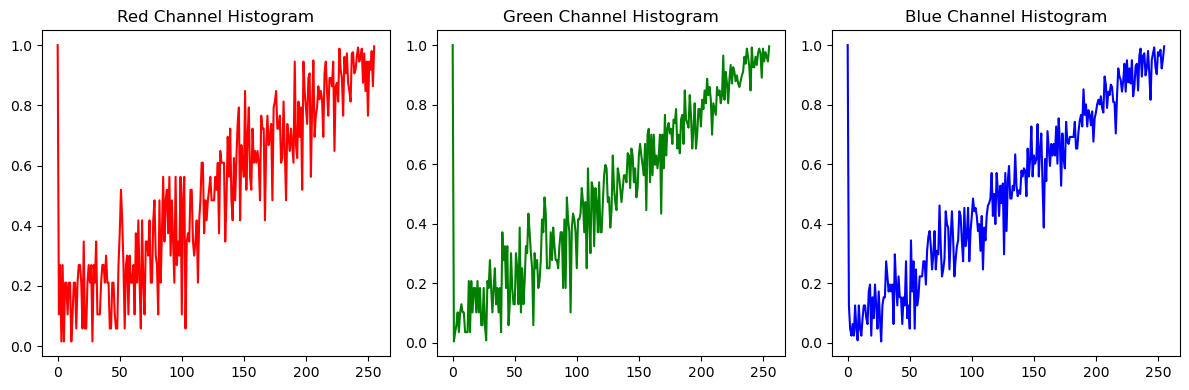

In [18]:
# Visualize the color histogram
plt.figure(figsize=(12, 4))
plt.subplot(131)
plt.title("Red Channel Histogram")
plt.plot(hist_red, color='red')
plt.subplot(132)
plt.title("Green Channel Histogram")
plt.plot(hist_green, color='green')
plt.subplot(133)
plt.title("Blue Channel Histogram")
plt.plot(hist_blue, color='blue')
plt.tight_layout()
plt.show()

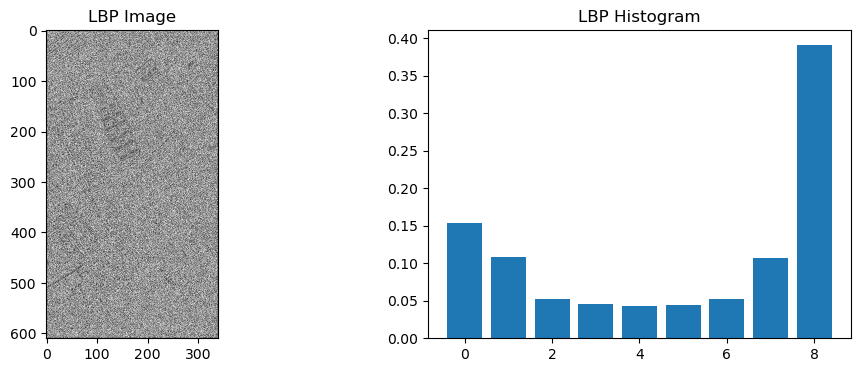

In [19]:
# Visualize LBP images and histograms
plt.figure(figsize=(12, 4))
plt.subplot(121)
plt.title("LBP Image")
plt.imshow(lbp, cmap='gray')
plt.subplot(122)
plt.title("LBP Histogram")
plt.bar(range(len(hist_lbp)), hist_lbp)
plt.show()

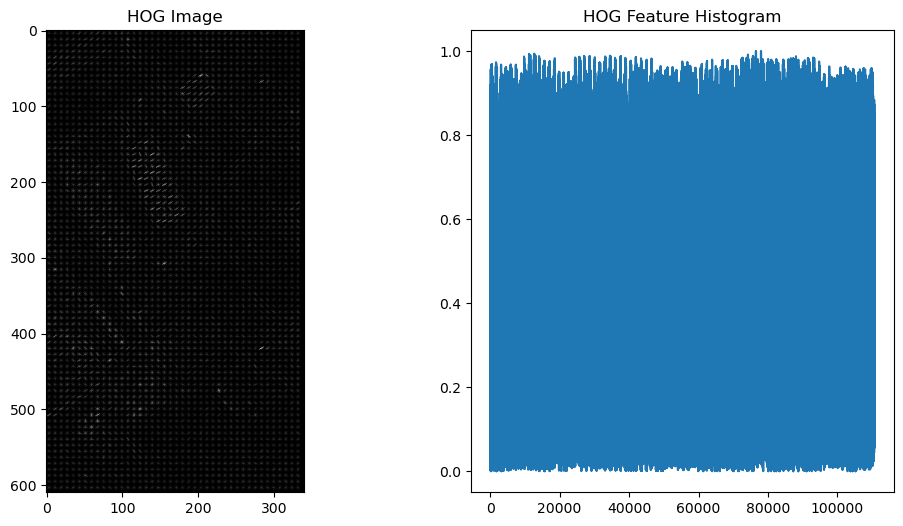

In [20]:
# Visualize HOG features
plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.title("HOG Image")
plt.imshow(hog_image, cmap='gray')
plt.subplot(122)
plt.title("HOG Feature Histogram")
plt.plot(hog_features)
plt.show()

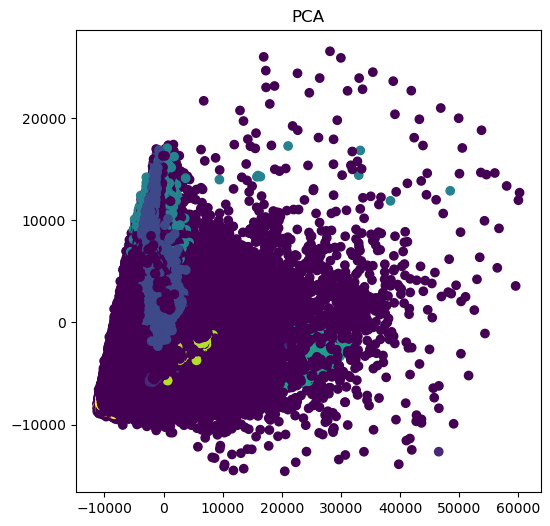

In [21]:
# Visualize PCA results
plt.figure(figsize=(6, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y)
plt.title("PCA")
plt.show()

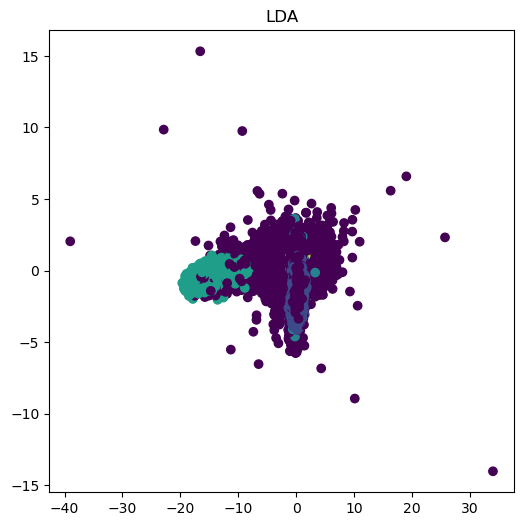

In [22]:
# Visualize LDA results
plt.figure(figsize=(6, 6))
plt.scatter(X_lda[:, 0], X_lda[:, 1], c=y)
plt.title("LDA")
plt.show()

#### We choose Principal Component Analysis (PCA) among these five methods for several reasons:

1. **Dimensionality Reduction:** PCA is primarily used for dimensionality reduction. It transforms the original data into a new set of uncorrelated variables, known as principal components. By selecting a subset of these components, you can effectively reduce the dimensionality of your data while retaining most of the variance. This can be particularly useful if you have high-dimensional data and want to reduce computational complexity.

2. **Decorrelation:** PCA ensures that the resulting principal components are orthogonal (uncorrelated). This is advantageous because it simplifies the interpretation of the transformed data. Other methods like color histograms, LBP, and HOG do not inherently provide decorrelation.

3. **Data Visualization:** PCA allows you to visualize the data in a lower-dimensional space, making it easier to observe the relationships between data points. This can be valuable for exploratory data analysis and pattern recognition.

4. **Noise Reduction:** By retaining the top principal components that capture the most variance, you can effectively reduce the influence of noise in your data. This can enhance the signal-to-noise ratio in your analysis.

5. **Computationally Efficient:** PCA is computationally efficient, making it suitable for large datasets.


### 1.3.3  investigate and experiment on the data
### (Data Preprocessing)

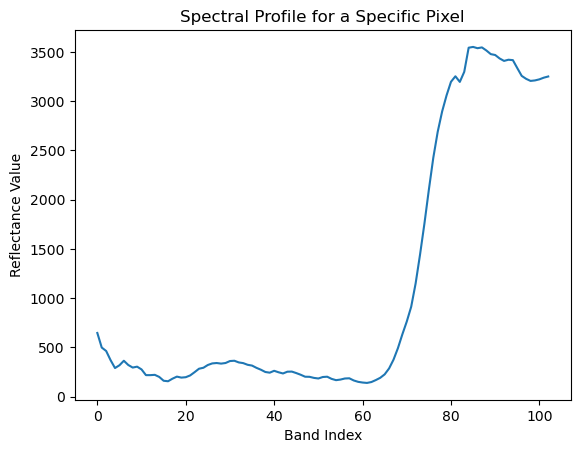

In [23]:
# Get any position and plot a specific feature
feature = paviau_data_array[0, 0, :]
plt.plot(feature)
plt.xlabel('Band Index')
plt.ylabel('Reflectance Value')
plt.title('Spectral Profile for a Specific Pixel')
plt.show()

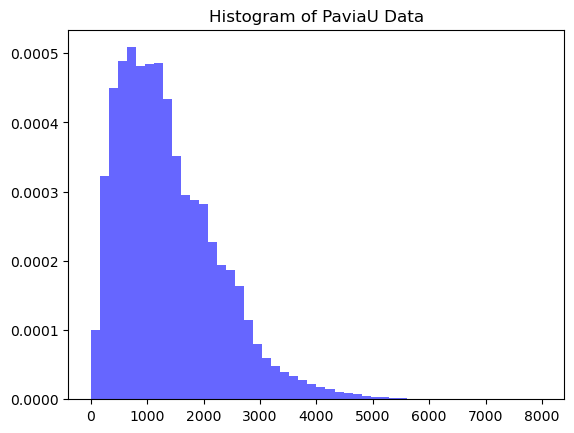

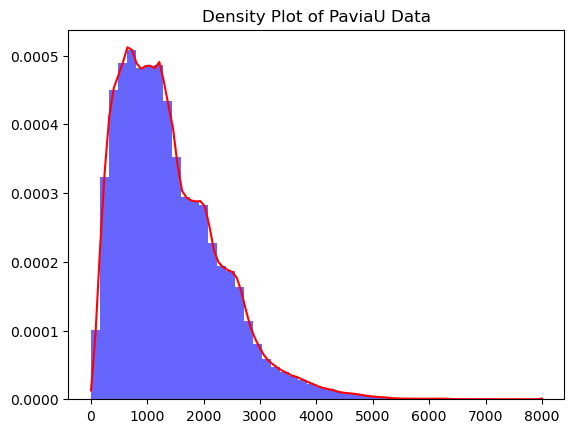

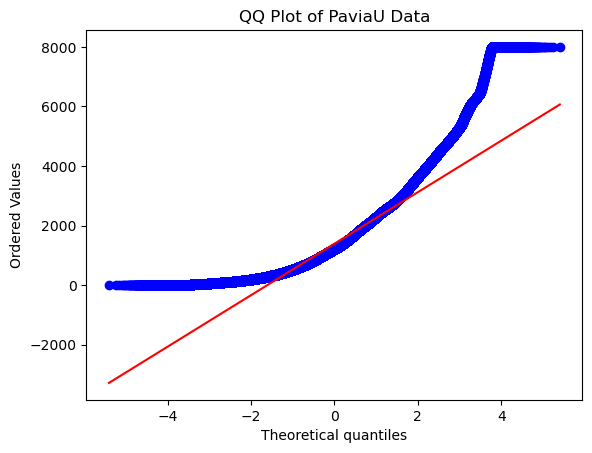

Mean: 1389.1253099399873
Median: 1215.0
Standard Deviation: 897.6575399774091
Q1: 702.0
Q3: 1917.0
Kolmogorov-Smirnov Test: KstestResult(statistic=0.9998261357206557, pvalue=0.0, statistic_location=5, statistic_sign=-1)
Shapiro-Wilk Test: ShapiroResult(statistic=0.9478210806846619, pvalue=0.0)


D:\Anaconda\Lib\site-packages\scipy\stats\_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [24]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Extracted data arrays
paviau_data_array = paviau_data['paviaU']
paviau_gt_array = paviau_gt_data['paviaU_gt']

# Histogram
plt.hist(paviau_data_array.flatten(), bins=50, density=True, alpha=0.6, color='b')
plt.title("Histogram of PaviaU Data")
plt.show()

# Density Plot
plt.hist(paviau_data_array.flatten(), bins=50, density=True, alpha=0.6, color='b')
kde = stats.gaussian_kde(paviau_data_array.flatten())
x = np.linspace(np.min(paviau_data_array), np.max(paviau_data_array), 100)
plt.plot(x, kde(x), 'r')
plt.title("Density Plot of PaviaU Data")
plt.show()

# QQ Plot (Quantile-Quantile Plot)
stats.probplot(paviau_data_array.flatten(), dist="norm", plot=plt)
plt.title("QQ Plot of PaviaU Data")
plt.show()

# Statistical Descriptions
mean = np.mean(paviau_data_array)
median = np.median(paviau_data_array)
std_dev = np.std(paviau_data_array)
q1, q3 = np.percentile(paviau_data_array, [25, 75])
print("Mean:", mean)
print("Median:", median)
print("Standard Deviation:", std_dev)
print("Q1:", q1)
print("Q3:", q3)

# Statistical Tests
kstest_result = stats.kstest(paviau_data_array.flatten(), 'norm')
shapiro_result = stats.shapiro(paviau_data_array.flatten())
print("Kolmogorov-Smirnov Test:", kstest_result)
print("Shapiro-Wilk Test:", shapiro_result)

**Kolmogorov-Smirnov Test Result:**
- `Statistic`: 0.9998261357206557
- `p-value`: 0.0

The Kolmogorov-Smirnov test is used to assess whether the data follows a normal distribution. The test results are as follows:
- The test statistic is 0.9998261357206557, which measures the similarity between the data distribution and a normal distribution. A value close to 1 indicates a strong similarity to a normal distribution.
- The p-value is 0.0, which represents the probability of observing the given test statistic or more extreme values under the null hypothesis that the data follows a normal distribution. Typically, a p-value less than the significance level (usually 0.05) leads to rejection of the null hypothesis. In this case, the p-value is 0.0, indicating that the data does not follow a normal distribution.

**Shapiro-Wilk Test Result:**
- `Statistic`: 0.9478210806846619
- `p-value`: 0.0

The Shapiro-Wilk test is also used to assess whether the data follows a normal distribution. The test results are as follows:
- The test statistic is 0.9478210806846619, indicating the similarity between the data distribution and a normal distribution. A value close to 1 suggests a strong similarity to a normal distribution.
- The p-value is 0.0, which represents the probability of observing the given test statistic or more extreme values under the null hypothesis that the data follows a normal distribution. In this case, the p-value is 0.0, indicating that the data does not follow a normal distribution.


In [25]:
# X represents the data features, and y represents the labels
# Remove samples with label values equal to 0 from data features X
X = X[y != 0]
y = y[y != 0]
n_components = 3
pca = PCA(n_components=n_components)

# Refresh the PCA data features X
X_pca = pca.fit_transform(X)

# Print the shape of the reduced data features X_pca
print("Shape of X_pca:", X_pca.shape)

# Print the shape of the labels y
print("Shape of y:", y.shape)
print(X_pca)

Shape of X_pca: (42776, 3)
Shape of y: (42776,)
[[ 5460.95376753 -1156.4408728   1824.7205709 ]
 [ 5951.32007734 -4431.43559822  -654.21433639]
 [ 1740.10263792 -6151.0652186  -1943.79510797]
 ...
 [  465.43019773  2404.91125521  1933.31637766]
 [ -177.81822579  3260.5440623    964.11028672]
 [-2358.02351473  2083.70404048   251.76189248]]


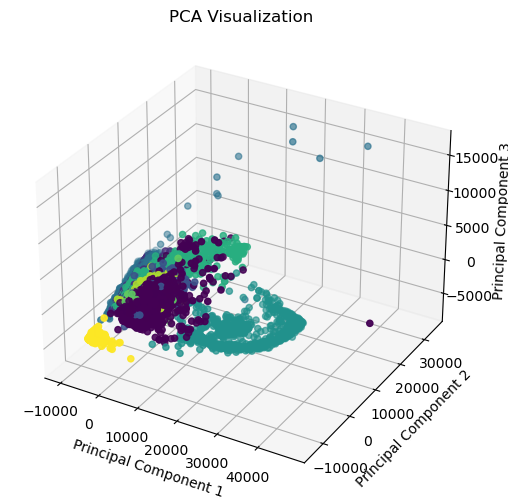

In [26]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # Used for three-dimensional visualization

# Create a figure
fig = plt.figure(figsize=(8, 6))

# Create a 3D subplot
ax = fig.add_subplot(111, projection='3d')

# Visualize the reduced data X_pca
ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=y, cmap=plt.get_cmap('viridis'))

# Set the plot title and axis labels
ax.set_title('PCA Visualization')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')

# Show the visualization
plt.show()

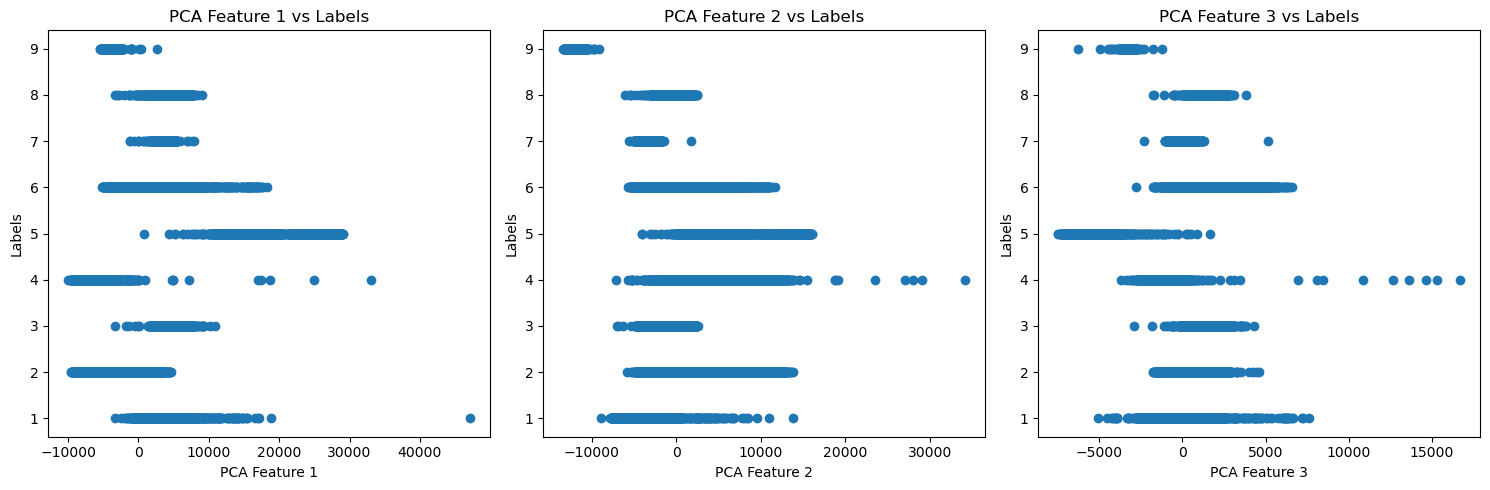

In [27]:
import matplotlib.pyplot as plt

# Create a figure with 3 subplots
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Plot the scatterplot of the first feature vs. labels
axs[0].scatter(X_pca[:, 0], y)
axs[0].set_title('PCA Feature 1 vs Labels')
axs[0].set_xlabel('PCA Feature 1')
axs[0].set_ylabel('Labels')

# Plot the scatterplot of the second feature vs. labels
axs[1].scatter(X_pca[:, 1], y)
axs[1].set_title('PCA Feature 2 vs Labels')
axs[1].set_xlabel('PCA Feature 2')
axs[1].set_ylabel('Labels')

# Plot the scatterplot of the third feature vs. labels
axs[2].scatter(X_pca[:, 2], y)
axs[2].set_title('PCA Feature 3 vs Labels')
axs[2].set_xlabel('PCA Feature 3')
axs[2].set_ylabel('Labels')

# Show the plot
plt.tight_layout()
plt.show()

In [28]:
from sklearn.model_selection import train_test_split

# Split the dataset, typically using 70% of the data for training and 30% for testing
X_train, X_temp, y_train, y_temp = train_test_split(X_pca, y, test_size=0.3, random_state=7)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=7)

# X_train, y_train are the training set
# X_val, y_val are the validation set
# X_test, y_test are the test set

# Print the shapes of the training and test sets
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (29943, 3)
Shape of X_test: (6417, 3)
Shape of y_train: (29943,)
Shape of y_test: (6417,)


# Standardize Data
Standardization is crucial in machine learning to ensure that features have a mean of 0 and a standard deviation of 1. This equalizes feature contributions during distance calculations and optimization processes.

Many ML algorithms, such as K-Nearest Neighbors and Support Vector Machines, and optimization algorithms like gradient descent, are sensitive to feature scales. Failure to standardize can lead to slow convergence and larger errors on high-magnitude features.


In [29]:
# Import StandardScaler from scikit-learn
from sklearn.preprocessing import StandardScaler

# Create StandardScaler instance
scaler = StandardScaler()

# Standardize training data, using its statistics
X_train_Standardization = scaler.fit_transform(X_train)

# Use the same scaling parameters for test data
X_test_Standardization = scaler.transform(X_test)

# Use the same scaling parameters for validation data
X_val_Standardization = scaler.transform(X_val)

# 2 Description of the models, parameters, and evaluation on the performance over the model.


## 2.1.1 workflow

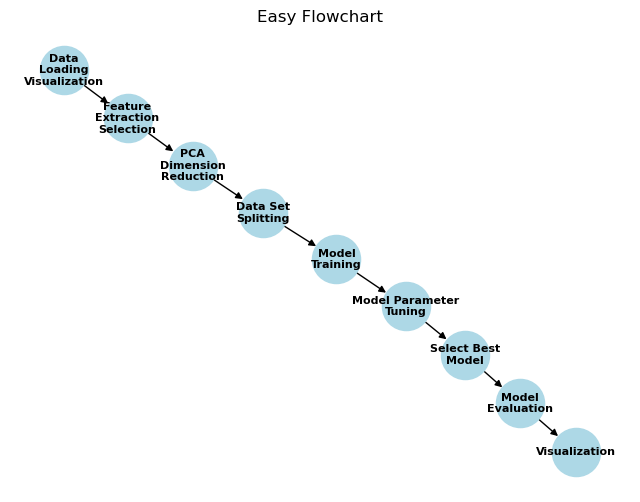

In [30]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a directed graph
G = nx.DiGraph()

# Define nodes and edges
nodes = {
    'Data\nLoading\nVisualization',
    'Feature\nExtraction\nSelection',
    'PCA\nDimension\nReduction',
    'Data Set\nSplitting',
    'Model\nTraining',
    'Select Best\nModel',
    'Model\nEvaluation',
    'Visualization'
}

edges = [
    ('Data\nLoading\nVisualization', 'Feature\nExtraction\nSelection'),
    ('Feature\nExtraction\nSelection', 'PCA\nDimension\nReduction'),
    ('PCA\nDimension\nReduction', 'Data Set\nSplitting'),
    ('Data Set\nSplitting', 'Model\nTraining'),
    ('Model\nTraining', 'Model Parameter\nTuning'),
    ('Model Parameter\nTuning', 'Select Best\nModel'),
    ('Select Best\nModel', 'Model\nEvaluation'),
    ('Model\nEvaluation', 'Visualization')
]

# Add nodes to the graph
G.add_nodes_from(nodes)

# Add edges to the graph
G.add_edges_from(edges)

# Define layout and create a figure and axis
pos = nx.kamada_kawai_layout(G)
fig, ax = plt.subplots(figsize=(8, 6))

# Draw the graph with labels and custom styling
nx.draw(G, pos, with_labels=True, node_size=1200, node_color='lightblue', font_size=8, font_weight='bold', arrows=True, ax=ax)
plt.title('Easy Flowchart')
plt.show()


## 2.1.2 model description

# K-Nearest Neighbors (KNN)

K-Nearest Neighbors (KNN) is a foundational supervised learning algorithm used for both classification and regression tasks. It operates based on the principle of proximity, where a new sample's class or value is determined by the classes or values of its nearest neighbors. Here's a detailed overview of KNN:

## Theoretical Foundation

KNN identifies the K nearest neighbors of a new sample in the feature space, typically using distance measurements. In classification tasks, it classifies the new sample by majority voting among its neighbors. In regression, it predicts the new sample's target value by calculating the average (or weighted average) of the target values of its K nearest neighbors.

## Functionality and Characteristics

- **Non-parametric Nature**: KNN is non-parametric, meaning it doesn't assume specific data distributions, making it versatile for various data types.

- **Simplicity and Interpretability**: KNN's straightforward concept makes it beginner-friendly and easy to implement.

- **Suitable for Small Datasets**: KNN performs well with small datasets, but can be computationally expensive for larger ones due to distance calculations.

- **Choosing K**: Selecting the appropriate value of K is crucial, as it can impact the model's performance.

- **Sensitivity to Noisy Data**: KNN is sensitive to noise; outliers can have a significant influence on predictions.

- **Suitable for Low-Dimensional Data**: KNN is effective when dealing with a moderate number of features. In high-dimensional spaces, the "curse of dimensionality" can affect its performance.

## Application Areas

KNN finds applications in various domains, including:

- **Pattern Recognition**: Recognizing patterns in tasks like image and character recognition.

- **Recommendation Systems**: Building recommendation systems based on user or item similarities.

- **Data Mining**: Used in data classification and clustering.

- **Medical Field**: Applied in disease prediction and drug design.

- **Finance**: Employed in credit scoring, fraud detection, and financial applications.

It's important to note that KNN's performance depends on factors like the choice of K and the distance metric. Careful hyperparameter tuning and data preprocessing are crucial when using KNN.


## 2.2.1  include model parameters estimation procedure

In [31]:
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

# Define k values to try
ks = [1, 3, 5, 7, 9, 11, 13, 15, 17]

# Initialize K-Fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# List to store average accuracy for each k
avg_scores = []

for k in ks:
    # List to store accuracy for each fold
    fold_scores = []
    
    # Perform cross-validation
    for train_index, val_index in kf.split(X_train_Standardization):
        
        # Train KNN model
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train_Standardization[train_index], y_train[train_index])
        
        # Compute accuracy on validation set and store it
        score = knn.score(X_train_Standardization[val_index], y_train[val_index])
        fold_scores.append(score)
    
    # Compute and store average accuracy for this k
    avg_score = np.mean(fold_scores)
    avg_scores.append(avg_score)

# Find the best k (the one that gives the highest average accuracy)
best_k = ks[np.argmax(avg_scores)]
best_score = max(avg_scores)

print("Best accuracy: %.2f" % best_score, "Best K value: %d" % best_k)

Best accuracy: 0.84 Best K value: 13


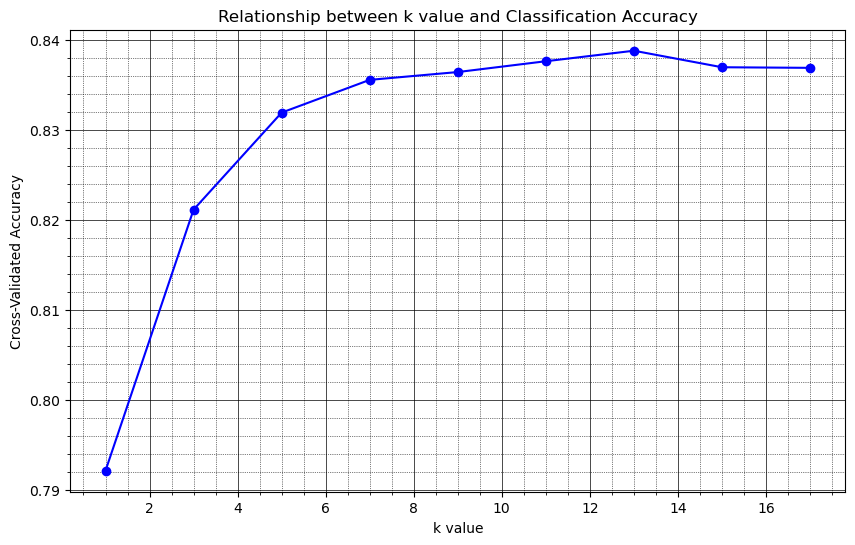

In [32]:
import matplotlib.pyplot as plt

# Create a new figure
plt.figure(figsize=(10, 6))

# Plot the relationship between k values and average accuracy
plt.plot(ks, avg_scores, marker='o', linestyle='-', color='b')

# Add grid for better visualization
plt.grid(True)

# Add title and labels
plt.title('Relationship between k value and Classification Accuracy')
plt.xlabel('k value')
plt.ylabel('Cross-Validated Accuracy')

# Beautify the plot with minor ticks
plt.minorticks_on()

# Customize the major grid
plt.grid(which='major', linestyle='-', linewidth='0.5', color='black')

# Customize the minor grid
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')

# Display the plot
plt.show()

## 2.2.2  training procedure description

In [33]:
from sklearn.neighbors import KNeighborsClassifier

# Create a KNN classifier using the best k value
knn = KNeighborsClassifier(n_neighbors=best_k)

# Train the model on the entire training set
knn.fit(X_train_Standardization, y_train)

KNeighborsClassifier(n_neighbors=13)

In [34]:
# Predict test set with trained classifier, store results in y_pred.
y_pred = knn.predict(X_test_Standardization)

# 2.3  demonstrate results with figures and plots


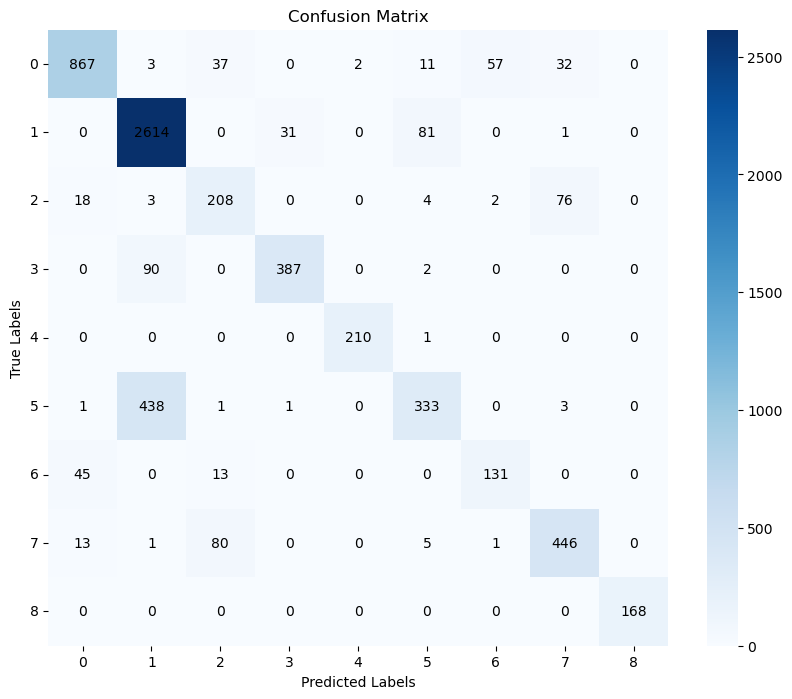

In [35]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Compute the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Create a new figure for the plot
plt.figure(figsize=(10, 8))

# Create a heatmap for the confusion matrix
# Use 'Blues' colormap, annotate cells with integers, and use black for the annotation color
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', annot_kws={"color": 'black'})

# Add labels and title
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')

# Improve visibility
plt.xticks(rotation=0)
plt.yticks(rotation=0)

# Show the plot
plt.show()

In [36]:
from sklearn.metrics import classification_report

# Print the classification report，used to evaluate model performance
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.92      0.86      0.89      1009
           2       0.83      0.96      0.89      2727
           3       0.61      0.67      0.64       311
           4       0.92      0.81      0.86       479
           5       0.99      1.00      0.99       211
           6       0.76      0.43      0.55       777
           7       0.69      0.69      0.69       189
           8       0.80      0.82      0.81       546
           9       1.00      1.00      1.00       168

    accuracy                           0.84      6417
   macro avg       0.84      0.80      0.81      6417
weighted avg       0.84      0.84      0.83      6417



## 2.1.2 model description

# Random Forest

Random Forest serves as an ensemble learning technique for classification and regression. It harnesses the power of numerous decision trees, each built with a random subset of features and trained on a Bootstrap sample drawn with replacement from the original dataset. This approach enhances model robustness, addresses overfitting concerns, and consistently achieves high predictive accuracy.Here's a detailed overview of Random Forest:

## Theoretical Foundation

The theoretical underpinning of Random Forest is rooted in ensemble learning, specifically the amalgamation of multiple decision trees. Decision trees serve as fundamental components, with each tree constructed using a distinct random subset of features and trained on a Bootstrap sample drawn with replacement from the original dataset. The introduction of randomness in feature selection and data sampling aims to decorrelate individual trees, fostering the development of a resilient and precise ensemble model. Through the amalgamation of diverse tree predictions, Random Forest effectively addresses overfitting concerns and exhibits strong generalization capabilities in both classification and regression scenarios.

## Functionality and Characteristics

- **Ensemble Synergy**: Random Forest leverages ensemble learning, synergizing predictions from multiple decision trees to enhance overall model efficacy.

- **Task Adaptability**: Versatile across classification and regression scenarios, Random Forest accommodates a broad spectrum of predictive modeling requirements.

- **Feature Diversity**: Each decision tree is crafted with a distinct subset of features, ensuring diversity and reducing redundancy within the ensemble.

- **Consistent Predictive Precision**: Through amalgamating diverse tree predictions, Random Forest consistently attains heightened predictive accuracy.

- **Adaptable to Complexity**: Inherently diverse, the model adapts well to intricate data relationships, demonstrating versatility across various datasets and scenarios.

## Application Areas

- **Finance**: In finance, Random Forest is employed for credit scoring, aiding in the assessment of creditworthiness and managing financial risk.
- **Ecology**: Applied in ecology for species classification, Random Forest helps analyze and predict patterns in biodiversity.
- **Marketing**: Widely used in marketing for customer segmentation, targeted advertising, and the development of personalized marketing strategies.
- **Image Analysis**: In computer vision, Random Forest is applied to tasks such as object recognition, image classification, and feature extraction.
- **Remote Sensing**: Used for land cover classification and environmental analysis in studies involving remote sensing data.


# 2.2.1  include model parameters estimation procedure

Best value of n_estimators: 200
Performance of the best model: 0.8392278406649109


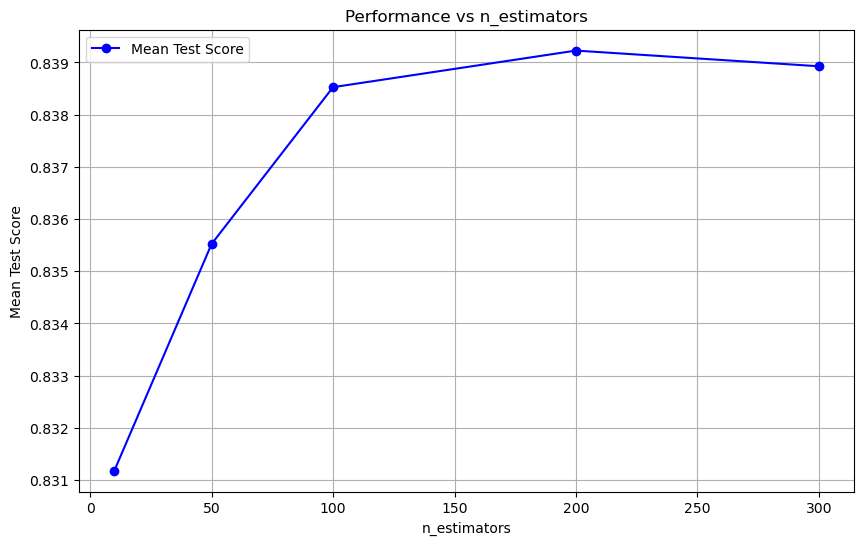

In [37]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

# Define the values of n_estimators to be searched
param_grid = {'n_estimators': [10, 50, 100, 200, 300]}

# Create an instance of RandomForestClassifier
rf = RandomForestClassifier()

# Create a GridSearchCV object
# estimator: the model to be trained
# param_grid: the parameters to be searched
# cv: the number of folds in cross-validation
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5)

# Fit the model with the training data and find the best parameters
# X_train_Standardization: the standardized training data
# y_train: the labels of the training data
grid_search.fit(X_train_Standardization, y_train)

# Print the best value of n_estimators and the performance of the best model
print("Best value of n_estimators:", grid_search.best_params_['n_estimators'])
print("Performance of the best model:", grid_search.best_score_)

# Extract performance scores for different n_estimators
n_estimators_values = grid_search.cv_results_['param_n_estimators'].data
mean_scores = grid_search.cv_results_['mean_test_score']

# Create a new figure
plt.figure(figsize=(10, 6))

# Plot the curve
# n_estimators_values: the values of n_estimators
# mean_scores: the mean test scores corresponding to the n_estimators values
plt.plot(n_estimators_values, mean_scores, marker='o', linestyle='-', color='b', label='Mean Test Score')

# Add labels, title, and legend
plt.xlabel('n_estimators')
plt.ylabel('Mean Test Score')
plt.title('Performance vs n_estimators')
plt.legend(loc='best')

# Add grid lines
plt.grid(True)

# Display the figure
plt.show()

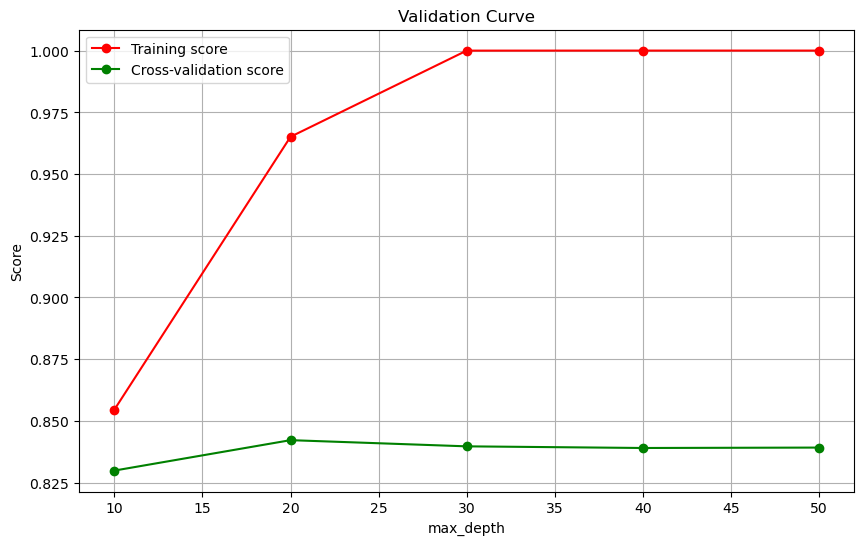

In [39]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import validation_curve
import matplotlib.pyplot as plt
import numpy as np

# Define the function to plot the validation curve
def plot_validation_curve(estimator, X, y, param_name, param_range):
    
    # Calculate the training and test scores
    train_scores, test_scores = validation_curve(estimator, X, y, param_name=param_name, 
                                                  param_range=param_range, cv=5)
    # Calculate the mean training and test scores
    train_scores_mean = np.mean(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)

    # Create a new figure
    plt.figure(figsize=(10, 6))

    # Plot the mean training scores
    plt.plot(param_range, train_scores_mean, 'o-', color='r', label='Training score')

    # Plot the mean test scores
    plt.plot(param_range, test_scores_mean, 'o-', color='g', label='Cross-validation score')

    # Add labels and legend
    plt.xlabel(param_name)
    plt.ylabel('Score')
    plt.legend(loc='best')
    
    # Add a title
    plt.title('Validation Curve')

    # Add grid lines
    plt.grid(True)

    # Display the figure
    plt.show()

# Define the best n_estimators value
best_n_estimators = 200

# Create an instance of RandomForestClassifier    
rf_classifier = RandomForestClassifier(n_estimators=best_n_estimators, random_state=42)

# Plot the validation curve
param_range = [10, 20, 30, 40, 50]
plot_validation_curve(rf_classifier, X_train_Standardization, y_train, 'max_depth', param_range)

In the figure, the red curve represents the training score and the green curve represents the cross-validation score. By comparing these two curves, we can observe the overfitting or underfitting of the model at different depths. For example, if the training score is high but the cross-validation score is low, there may be overfitting; if both are low, there may be underfitting. By choosing the depth value that gives the highest cross-validation score, we can find the best model parameters.

The best max_depth is 20.

# 2.2.2  training procedure description

In [44]:
from sklearn.ensemble import RandomForestClassifier

# Define the best n_estimators value
best_n_estimators = 200

# Define the best max_depth value
best_max_depth = 20

# Create an instance of RandomForestClassifier
# n_estimators: the number of trees in the forest
# max_depth: the maximum depth of the tree
# random_state: controls both the randomness of the bootstrapping of the samples used when building trees
rf_classifier = RandomForestClassifier(n_estimators=best_n_estimators, max_depth=best_max_depth, random_state=42)

# Fit the model with the training data
rf_classifier.fit(X_train_Standardization, y_train)

RandomForestClassifier(max_depth=20, n_estimators=200, random_state=42)

In [45]:
# Predict test set with trained classifier, store results in predictions.
predictions = rf_classifier.predict(X_test_Standardization)

# 2.3  demonstrate results with figures and plots

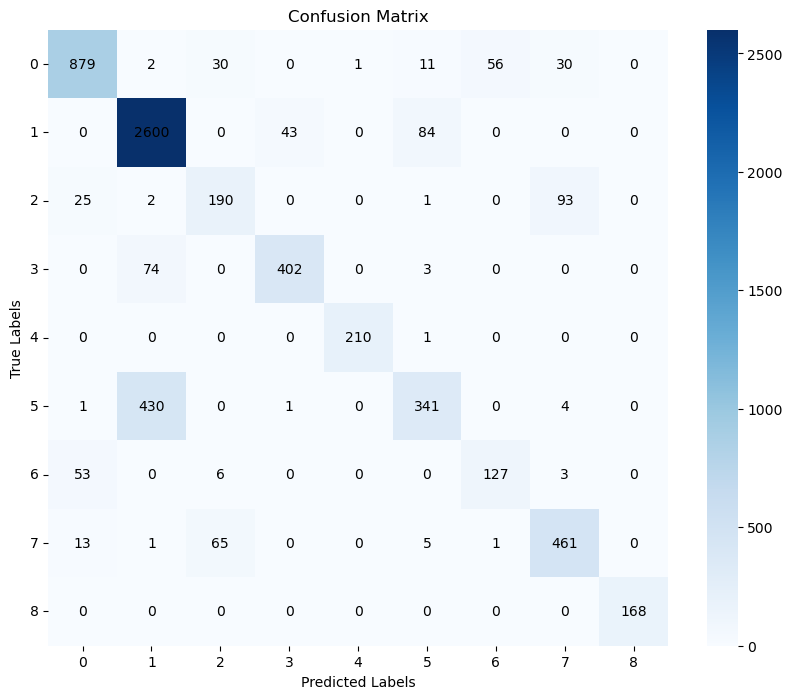

In [46]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Compute the confusion matrix
conf_matrix = confusion_matrix(y_test, predictions)

# Create a new figure for the plot
plt.figure(figsize=(10, 8))

# Create a heatmap for the confusion matrix
# Use 'Blues' colormap, annotate cells with integers, and use black for the annotation color
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', annot_kws={"color": 'black'})

# Add labels and title
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')

# Improve visibility
plt.xticks(rotation=0)
plt.yticks(rotation=0)

# Show the plot
plt.show()

In [47]:
from sklearn.metrics import classification_report

# Print the classification report，used to evaluate model performance
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           1       0.91      0.87      0.89      1009
           2       0.84      0.95      0.89      2727
           3       0.65      0.61      0.63       311
           4       0.90      0.84      0.87       479
           5       1.00      1.00      1.00       211
           6       0.76      0.44      0.56       777
           7       0.69      0.67      0.68       189
           8       0.78      0.84      0.81       546
           9       1.00      1.00      1.00       168

    accuracy                           0.84      6417
   macro avg       0.84      0.80      0.81      6417
weighted avg       0.83      0.84      0.83      6417



## 2.1.2 model description

# K-Means Clustering

K-Means is an unsupervised machine learning algorithm used for clustering, which involves grouping data points into clusters based on their similarity. Here's a comprehensive overview of K-Means:

## Theoretical Foundation

K-Means aims to partition a dataset into K clusters, where each cluster is represented by its center (centroid). The algorithm works iteratively, assigning data points to the nearest centroid and then updating the centroids based on the assigned points. This process continues until convergence is reached.

## Functionality and Characteristics

- **Clustering Method**: K-Means is used for data clustering, where it tries to find groups of similar data points.

- **Objective Function**: It minimizes the sum of squared distances between data points and their respective cluster centroids.

- **Initialization**: The algorithm starts with an initial guess for the cluster centroids, and the final result may depend on the initial values.

- **Sensitivity to K**: The choice of K (the number of clusters) can significantly affect the clustering outcome.

- **Sensitive to Initializations**: Different initializations may lead to different solutions, making multiple runs with different initializations common.

- **Euclidean Distance**: By default, K-Means uses the Euclidean distance to measure the dissimilarity between data points.

- **Scaling Matters**: Data scaling can impact K-Means results. Features with different scales may disproportionately affect the clustering.

## Application Areas

K-Means has a wide range of applications in diverse fields:

- **Image Compression**: Reducing the number of colors in an image to reduce storage space.

- **Customer Segmentation**: Grouping customers based on purchase behavior to tailor marketing strategies.

- **Anomaly Detection**: Identifying outliers or anomalies in data.

- **Document Clustering**: Organizing text documents into clusters based on content similarity.

- **Genomic Data Analysis**: Grouping genes or sequences with similar expression patterns.

- **Market Basket Analysis**: Identifying items frequently purchased together in retail.

- **Climate Data Analysis**: Clustering weather data to detect patterns or trends.

It's essential to understand that K-Means clustering can produce different results based on initializations and the choice of K. Therefore, choosing the right K and interpreting the clusters require careful consideration.




# Support Vector Machines (SVM)

Support Vector Machines (SVM) is a supervised machine learning algorithm used for classification and regression tasks. SVM works by finding the optimal hyperplane that best separates data points of different classes in a high-dimensional space. It aims to maximize the margin between classes while minimizing classification errors. SVM is effective in handling both linear and non-linear relationships in data through the use of kernel functions, making it a versatile and widely used algorithm in various domains.

## Theoretical Foundation
The theoretical foundation of Support Vector Machines (SVM) lies in the concept of finding an optimal hyperplane in a high-dimensional space to effectively separate different classes of data. SVM aims to maximize the margin, which is the distance between the hyperplane and the nearest data points from each class. It formulates the classification problem as a quadratic optimization task, seeking to minimize classification errors while achieving the maximum margin. Additionally, SVM can handle non-linear relationships by employing kernel functions, transforming input data into higher-dimensional spaces where a linear separation might be feasible. This theoretical framework makes SVM powerful for both linear and non-linear classification tasks.

## Functionality and Characteristics

- **Effective for High-Dimensional Spaces**:SVM excels in scenarios involving datasets with a substantial number of features, showcasing its effectiveness in situations where data is situated within a high-dimensional space.

- **Versatility with Kernels**：SVM exhibits the capacity to model intricate non-linear relationships through the utilization of kernel functions, which perform a transformative role on input data, projecting it into higher-dimensional spaces and enabling SVM to delineate complex decision boundaries.

- **Maximization of Margin**：The algorithm's primary objective is to optimize the margin between classes, fostering superior generalization to unseen data and enhancing resilience against overfitting.

- **Robust to Outliers**：SVM exhibits reduced sensitivity to outliers within the training data by prioritizing the optimization process on data points in proximity to the decision boundary, commonly known as support vectors.

- **Sensitivity to Data Distribution**：SVM demonstrate enhanced resilience to outliers during training by assigning greater emphasis to optimizing data points situated in the immediate vicinity of the decision boundary, a characteristic commonly attributed to these crucial instances termed support vectors.

SVM includes a regularization parameter that can be tuned to control the trade-off between achieving a smooth decision boundary and minimizing classification errors.

## Application Areas

Support Vector Machines (SVM) find widespread applications in various domains, including:

- **Pattern Recognition**: SVM is used in pattern recognition to identify complex patterns and structures, such as face recognition and handwriting recognition. By employing suitable kernel functions, SVM can handle non-linear patterns, enhancing the model's expressive power.

- **Pattern Recognition**:Image Classification: In computer vision, SVM is extensively applied to image classification tasks. By training an SVM model, it can effectively categorize images into different classes, such as medical image recognition and object recognition.

Text Classification: SVM is employed in natural language processing for tasks like text classification, including spam filtering and sentiment analysis. By representing text as feature vectors, SVM can learn and distinguish between different text categories.

Bioinformatics: SVM is used in bioinformatics to process biological data, such as gene expression data and protein sequence analysis. It can identify patterns in data, aiding researchers in understanding the complexity of biological systems.

Medical Diagnosis: SVM can be utilized in medical image analysis, such as tumor detection. By training an SVM classifier, it can assist doctors in more accurately diagnosing diseases.

In general, SVM is favored for its ability to handle complex data in high-dimensional spaces, making it suitable for classification and regression tasks in various fields.


# First, clustering the data using K-Means.

In [48]:
# Convert the reshaped data into a pandas DataFrame
DF = pd.DataFrame(X_pca)

# Display the DataFrame
DF

0            1            2
0      5460.953768 -1156.440873  1824.720571
1      5951.320077 -4431.435598  -654.214336
2      1740.102638 -6151.065219 -1943.795108
3       802.470457 -1171.514419   927.685634
4      9214.993002   172.991746  3845.181840
...            ...          ...          ...
42771   994.859385  1937.988629  1778.946565
42772   778.389280  2014.457167  1655.136371
42773   465.430198  2404.911255  1933.316378
42774  -177.818226  3260.544062   964.110287
42775 -2358.023515  2083.704040   251.761892

[42776 rows x 3 columns]

In [49]:
# Import the necessary library
from sklearn.preprocessing import MinMaxScaler

# Create a MinMaxScaler object
Scaler = MinMaxScaler()

# Fit the scaler to the data and transform the data
Scale = Scaler.fit_transform(DF)

# Convert the scaled data into a pandas DataFrame
Scale_DF = pd.DataFrame(Scale)

# Display the first 10 rows of the DataFrame
Scale_DF.head(10)

0         1         2
0  0.270418  0.257270  0.384528
1  0.279010  0.188362  0.281773
2  0.205225  0.152180  0.228319
3  0.188797  0.256953  0.347345
4  0.336192  0.285242  0.468277
5  0.275570  0.265312  0.221680
6  0.305790  0.276058  0.473007
7  0.300758  0.179831  0.174821
8  0.263922  0.189563  0.268986
9  0.212422  0.167647  0.275721

# 2.2.1  include model parameters estimation procedure

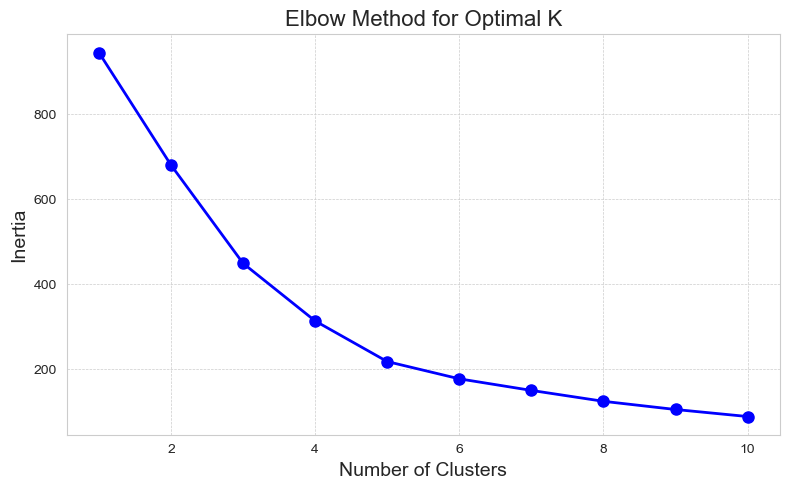

In [50]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Convert the column names of the DataFrame to string type
Scale_DF.columns = Scale_DF.columns.astype(str)

# Initialize a list to store the inertia for each K value
inertias = []

# Try different K values
for K in range(1, 11):
    
    # For each K value, create a K-Means model
    kmeans = KMeans(n_clusters=K, n_init=10, random_state=42)
    
    # Train the model with the data
    kmeans.fit(Scale_DF)
    
    # Calculate the inertia of the model and add it to the list
    inertias.append(kmeans.inertia_)

# Create a new figure with a nice style
plt.figure(figsize=(8, 5))
sns.set_style("whitegrid")

# Plot the elbow graph where the x-axis is K value and y-axis is the corresponding inertia
plt.plot(range(1, 11), inertias, marker='o', color='b', linestyle='-', linewidth=2, markersize=8)

# Add grid lines to make the graph easier to read
plt.grid(True, linestyle='--', linewidth=0.5)

# Set labels for x-axis and y-axis
plt.xlabel('Number of Clusters', fontsize=14)
plt.ylabel('Inertia', fontsize=14)

# Set title for the graph
plt.title('Elbow Method for Optimal K', fontsize=16)

# Display the graph
plt.tight_layout()
plt.show()

We have plotted an elbow graph where the x-axis represents the number of clusters (K) and the y-axis represents the corresponding inertia. By observing this graph, we can identify the "elbow point," where the inertia starts decreasing at a slower rate. This point is typically considered the optimal number of clusters. By finding this "elbow," we obtain a reasonable choice for the value of K. This K value strikes a balance between capturing the complexity of the data (using an adequate number of clusters) and maintaining model simplicity (avoiding an excessive number of clusters).

According to the graph, the most suitable value for K is 5.

# Clustering procedure description

In [51]:
from sklearn.cluster import KMeans

# Optimal K value is 5
n_clusters = 5

# Create a KMeans clustering model
KM = KMeans(n_clusters=n_clusters, n_init=10, random_state=42)

# Apply KMeans algorithm to cluster the data
Predicted = KM.fit_predict(Scale_DF)

# Increment cluster labels by 1 to match 1-based indexing
Predicted = Predicted + 1

# Evaluate the clustering effect

In [52]:
from sklearn.metrics import davies_bouldin_score

# Calculating Davies-Bouldin Score using the davies_bouldin_score function
Davies_Bouldin_Score = davies_bouldin_score(Scale_DF, Predicted)

# Printing the Davies-Bouldin Score
print('Davies-Bouldin Score:', Davies_Bouldin_Score)

Davies-Bouldin Score: 0.6922783408919738


- **Davies-Bouldin Score**: **0.6923**

A lower Davies-Bouldin Score suggests better separation and more distinct clusters. The score of 0.1042 indicates that the clusters generated by the model exhibit a reasonable level of separation. However, it's important to note that the interpretation of clustering quality metrics can be context-dependent, and further analysis may be required to optimize results.


# Next, support vector machines are used to classify the data.

# 2.2.1  include model parameters estimation procedure

In [61]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV
import numpy as np

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(Scale_DF, Predicted, test_size=0.3, random_state=42)

# Define a range of kernel functions and parameter values to try
param_grid = {
    'kernel': ['linear', 'rbf'],
    'C': [0.1, 1, 10],
    'gamma': [0.1, 1, 10]
}

# Create an SVM classifier
svm_classifier = SVC()

# Create a GridSearchCV object with cross-validation
grid_search = GridSearchCV(estimator=svm_classifier, param_grid=param_grid, cv=5)

# Fit the model with different kernel functions and parameter combinations
grid_search.fit(X_train, Y_train)

# Get the best kernel function and parameter values from the grid search
best_kernel = grid_search.best_params_['kernel']
best_C = grid_search.best_params_['C']
best_gamma = grid_search.best_params_['gamma']

print("Best Kernel Function:", best_kernel)
print("Best C Value:", best_C)
print("Best Gamma Value:", best_gamma)

Best Kernel Function: rbf
Best C Value: 10
Best Gamma Value: 10


# 2.2.2  training procedure description

In [62]:
from sklearn.svm import SVC

# Create an SVM classifier
svm_classifier = SVC(kernel=best_kernel, C=best_C, gamma=best_gamma)

# Train the SVM model using K-Means clustering labels as class labels
svm_classifier.fit(X_train, Y_train)

# Use the trained model to make predictions
Y_pred = svm_classifier.predict(X_test)

# Evaluate the model's performance on the test set
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(Y_test, Y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9971947323307099


# 2.3  demonstrate results with figures and plots

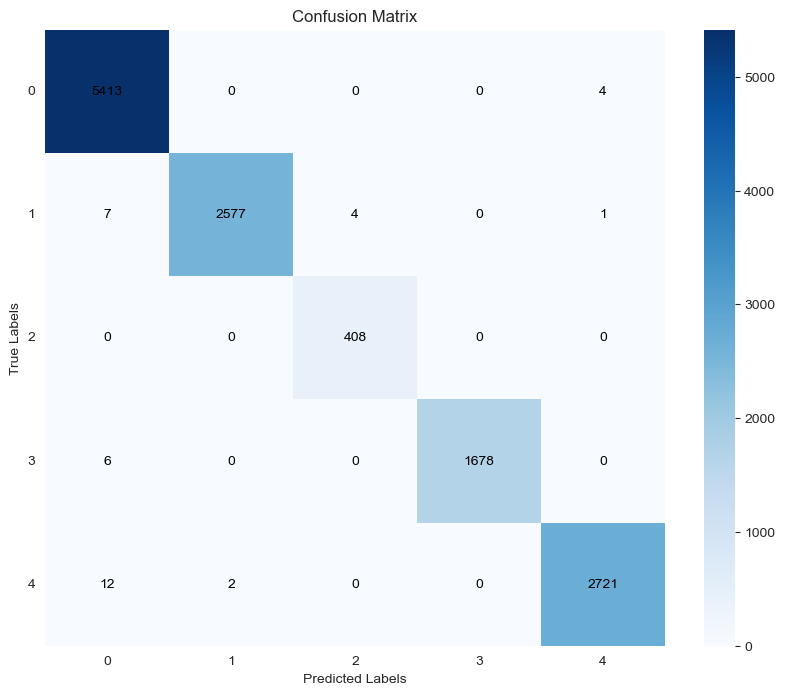

In [63]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Compute the confusion matrix
conf_matrix = confusion_matrix(Y_test, Y_pred)

# Create a new figure for the plot
plt.figure(figsize=(10, 8))

# Create a heatmap for the confusion matrix
# Use 'Blues' colormap, annotate cells with integers, and use black for the annotation color
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', annot_kws={"color": 'black'})

# Add labels and title
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')

# Improve visibility
plt.xticks(rotation=0)
plt.yticks(rotation=0)

# Show the plot
plt.show()

In [64]:
from sklearn.metrics import classification_report

# Generate the classification report
report = classification_report(Y_test, Y_pred, digits=4)

# Print the classification report
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

           1     0.9954    0.9993    0.9973      5417
           2     0.9992    0.9954    0.9973      2589
           3     0.9903    1.0000    0.9951       408
           4     1.0000    0.9964    0.9982      1684
           5     0.9982    0.9949    0.9965      2735

    accuracy                         0.9972     12833
   macro avg     0.9966    0.9972    0.9969     12833
weighted avg     0.9972    0.9972    0.9972     12833



## Possible Reasons for High Accuracy after K-Means and SVM Processing

When the accuracy of a model approaches 100% after undergoing K-Means clustering and SVM processing, there are several potential explanations:

### 1. Data Distribution

One possible reason is that the data may have a highly distinct separation between different classes, allowing K-Means clustering to group data into tight clusters and SVM to easily find linear boundaries. If the data naturally exhibits clear boundaries in the feature space, SVM can efficiently create linear separations.

### 2. Effective Feature Engineering

After K-Means clustering, the data may have been transformed in a way that enhances separability between classes. Effective feature engineering or selection could have been applied to make the data more suitable for SVM classification.

### 3. Small Dataset Size

If the dataset is relatively small, SVM might be able to memorize all the training examples, resulting in 100% accuracy on the training data. However, high accuracy on a small dataset does not guarantee good generalization to unseen data.

### 4. Hyperparameter Tuning

The model's hyperparameters, such as the regularization parameter (C) and the choice of kernel functions, may have been carefully tuned to optimize its performance. Proper parameter selection can lead to high accuracy.

While achieving near-perfect accuracy is desirable, it is essential to conduct a more comprehensive evaluation of the model. This may involve using cross-validation, considering additional performance metrics (e.g., precision, recall, and F1-score), and addressing potential issues related to data imbalance. Additionally, it is crucial to ensure that the data splitting and feature engineering processes are conducted correctly to minimize potential pitfalls.


## 2.2.3  introduce the hardware you use

#### CPU:
- 11th Gen Intel(R) Core(TM) i5-11300H @ 3.10GHz 
- AMD Ryzen 5 5600H with Radeon Graphics @ 3.30 GHz
- 11th Gen Intel(R) Core(TM) i7-11800H @ 2.30GHz


#### GPU:
- NVIDIA GeForce RTX 3050 Laptop GPU
- NVIDIA GeForce RTX 3060 Laptop GPU